In [2]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})

In [4]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,1.341681,0.035037
b,0.314908,0.904089


In [12]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,-0.237019,-0.009389,0.777130,-0.225709,0.128663
Steve,0.142500,0.297077,-0.835425,1.027180,-0.093363
Wes,-0.330090,NaN,NaN,0.450473,0.404368
Jim,-1.178424,-0.348662,-1.275396,-2.131551,0.448818
Travis,-1.239105,1.091670,-0.715681,-1.402686,1.095693


In [13]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [15]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.551421,-0.117745
Steve,0.191754,0.346215
Wes,0.450473,0.074279
Jim,-3.406947,-1.078268
Travis,-2.118367,0.948259


In [19]:
people.groupby(len, axis=0).sum()  # invsersed the index and  column

,a,b,c,d,e
3,-1.745533,-0.358051,-0.498266,-1.906787,0.981849
5,0.142500,0.297077,-0.835425,1.027180,-0.093363
6,-1.239105,1.091670,-0.715681,-1.402686,1.095693


In [20]:
tips = pd.read_csv('ch08/tips.csv')

In [21]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [29]:
grouped = tips.groupby(['sex', 'smoker'])

In [26]:
grouped.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [27]:
functions = ['count', 'mean', 'max']

In [30]:
grouped['tip_pct', 'total_bill'].agg(functions)

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [31]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})

In [32]:
factor = pd.cut(frame.data1, 4)

In [33]:
grouped = frame.data1.groupby(factor)

In [34]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
    'count': group.count(), 'mean': group.mean()}

In [36]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.882, -1.317]",96.0,-1.317268,-1.762197,-2.876258
"(-1.317, 0.243]",488.0,0.238358,-0.413906,-1.269705
"(0.243, 1.802]",375.0,1.787916,0.840350,0.243681
"(1.802, 3.362]",41.0,3.361709,2.293079,1.806872


In [4]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})

In [5]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.253784
b   -0.595466
dtype: float64

In [6]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

G:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
parties = { 'Bachmann, Michelle': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Obama, Barack': 'Democrat',
            'Paul, Ron': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Perry, Rick': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Romney, Mitt': 'Republican',
            'Santorum, Rick': 'Republican'}

In [9]:
fec['party'] = fec.cand_nm.map(parties)

In [11]:
fec = fec[fec.contb_receipt_amt > 0]

In [12]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [15]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [19]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [20]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [23]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [24]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [25]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


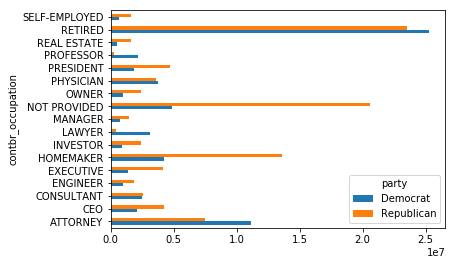

In [29]:
over_2mm.plot(kind='barh')
plt.show()

In [51]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[0:n]

In [52]:
grouped = fec_mrbo.groupby('cand_nm')

In [53]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [54]:
grouped.apply(get_top_amounts, 'contbr_employer', n=5)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
Name: contb_receipt_amt, dtype: float64

In [56]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [57]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [62]:
grouped.size().unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [63]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [67]:
bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN
